In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
     |████████████████████████████████| 6.4 MB 33.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
import yfinance as yf
import pandas as pd
import numpy as np

stock = yf.Ticker("ASIANPAINT.NS")

In [4]:
stock_historical = stock.history(interval="1d", period="3mo")
stock_historical.drop(['Dividends','Stock Splits'], axis=1, inplace=True)
stock_historical['Returns']=((stock_historical['Close']-stock_historical['Open'])/stock_historical['Open'])*100
stock_historical.to_csv('Stock_data')
StockData = pd.read_csv('Stock_data')
StockData = StockData.sort_values('Date')
print("Number of rows and columns:", StockData.shape)
StockData.tail()

Number of rows and columns: (63, 7)


,Date,Open,High,Low,Close,Volume,Returns
58,2022-07-04,2775.149902,2798.000000,2744.800049,2790.300049,653147,0.545922
59,2022-07-05,2785.000000,2812.300049,2760.000000,2766.600098,1073043,-0.660679
60,2022-07-06,2830.550049,2869.000000,2805.149902,2861.399902,2085735,1.089889
61,2022-07-07,2901.399902,2932.000000,2876.800049,2891.399902,1469087,-0.344661
62,2022-07-08,2880.000000,2888.000000,2840.500000,2879.800049,1274148,-0.006943


In [5]:
StockData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 0 to 62
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     63 non-null     object 
 1   Open     63 non-null     float64
 2   High     63 non-null     float64
 3   Low      63 non-null     float64
 4   Close    63 non-null     float64
 5   Volume   63 non-null     int64  
 6   Returns  63 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.9+ KB


In [6]:
StockData.isnull().sum().sum()
# No null values in any of the columns

0

In [7]:
StockData.describe()

,Open,High,Low,Close,Volume,Returns
count,63.000000,63.000000,63.000000,63.000000,6.300000e+01,63.000000
mean,2916.337953,2950.366813,2873.634149,2913.174297,1.386811e+06,-0.100084
std,179.976595,182.835630,182.017932,182.643097,6.147401e+05,1.671319
min,2600.000000,2657.000000,2560.000000,2580.199951,5.955220e+05,-6.612371
25%,2775.074951,2784.800049,2703.636817,2759.549927,9.461890e+05,-1.017787
50%,2901.399902,2932.000000,2840.500000,2891.399902,1.228489e+06,-0.138981
75%,3072.444128,3109.953076,3050.470849,3068.914673,1.757185e+06,1.124264
max,3230.384049,3259.217886,3202.842811,3229.091553,3.381427e+06,3.112208


In [8]:
import matplotlib.pyplot as plt


In [9]:
date = StockData.Date.values
date

array(['2022-04-08', '2022-04-11', '2022-04-12', '2022-04-13',
       '2022-04-18', '2022-04-19', '2022-04-20', '2022-04-21',
       '2022-04-22', '2022-04-25', '2022-04-26', '2022-04-27',
       '2022-04-28', '2022-04-29', '2022-05-02', '2022-05-04',
       '2022-05-05', '2022-05-06', '2022-05-09', '2022-05-10',
       '2022-05-11', '2022-05-12', '2022-05-13', '2022-05-16',
       '2022-05-17', '2022-05-18', '2022-05-19', '2022-05-20',
       '2022-05-23', '2022-05-24', '2022-05-25', '2022-05-26',
       '2022-05-27', '2022-05-30', '2022-05-31', '2022-06-01',
       '2022-06-02', '2022-06-03', '2022-06-06', '2022-06-07',
       '2022-06-08', '2022-06-09', '2022-06-10', '2022-06-13',
       '2022-06-14', '2022-06-15', '2022-06-16', '2022-06-17',
       '2022-06-20', '2022-06-21', '2022-06-22', '2022-06-23',
       '2022-06-24', '2022-06-27', '2022-06-28', '2022-06-29',
       '2022-06-30', '2022-07-01', '2022-07-04', '2022-07-05',
       '2022-07-06', '2022-07-07', '2022-07-08'], dtype

In [10]:
price=StockData.Open.values
price

array([3149.8483114 , 3165.75656702, 3136.62442231, 3099.33916118,
       3038.48986605, 3012.63901557, 2974.16067098, 3072.0963019 ,
       3103.61470062, 3116.04301947, 3112.06589536, 3078.26064712,
       3171.7222059 , 3230.38404885, 3176.69344368, 3159.79086065,
       3086.96049103, 3002.69628704, 2983.65606958, 3033.51846596,
       3072.69275282, 3024.5700408 , 3056.78440546, 3072.19550281,
       2981.71710465, 3012.63895839, 2983.30785253, 3062.35251255,
       3125.93601914, 3156.55959114, 3021.58738269, 2833.67036858,
       2851.56714016, 2863.49831883, 2827.70465988, 2843.26494135,
       2853.75440469, 2888.35503092, 2854.64938467, 2783.95682873,
       2756.01773124, 2680.        , 2665.        , 2669.94995117,
       2617.        , 2650.        , 2694.94995117, 2650.10009766,
       2600.        , 2674.94995117, 2688.        , 2674.94995117,
       2775.        , 2779.89990234, 2780.        , 2706.5       ,
       2714.85009766, 2704.89990234, 2775.14990234, 2785.     

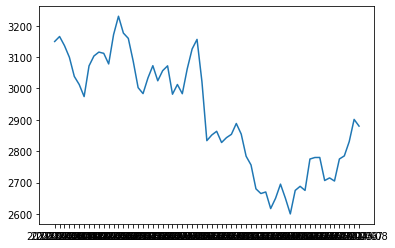

In [11]:
plt.plot(date,price)

In [12]:
import plotly.graph_objects as go
from plotly.offline import iplot
growth_graph = go.Scatter(x=StockData.Date,y=stock_historical.Open, marker=dict(color='red'))
layout = go.Layout(title='growth', xaxis=dict(title='Date'), yaxis=dict(title='Price'))
fig = go.Figure(data=[growth_graph], layout=layout)
fig.update_layout(template='plotly_dark')
iplot(fig)

In [13]:
import plotly.graph_objects as go
from plotly.offline import iplot
fig = go.Figure()
fig.add_trace(go.Scatter(x=StockData.Date, y=StockData.Open, name='Open'))
fig.add_trace(go.Scatter(x=StockData.Date, y=StockData.Close, name='Close'))
fig.update_layout()
iplot(fig)

In [14]:
import plotly.graph_objects as go
from plotly.offline import iplot
fig = go.Figure()
fig.add_trace(go.Scatter(x=StockData.Date, y=StockData.High, name='High'))
fig.add_trace(go.Scatter(x=StockData.Date, y=StockData.Low, name='Low'))
fig.update_layout(template='plotly_dark')
iplot(fig)

In [15]:
import plotly.graph_objects as go
from plotly.offline import iplot
fig = go.Figure()
fig.add_trace(go.Scatter(x=StockData.Date, y=StockData.Volume,name='Volume'))
fig.update_layout(template='plotly_dark')
iplot(fig)

In [16]:
import plotly.graph_objects as go
from plotly.offline import iplot
fig = go.Figure()
fig.add_trace(go.Scatter(x=StockData.Date, y=StockData.Returns,name='Returns'))
fig.update_layout(template='plotly_dark')
iplot(fig)